In [ ]:
## https://www.kaggle.com/nicapotato/this-model-is-bland-simple-logistic-starter/comments

In [1]:
import time
notebookstart= time.time()

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# TSNE
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

import os
import gc


# Any results you write to the current directory are saved as output.

In [161]:
dataML = dataML.reset_index(drop=True)

In [162]:
dataML

,cuisine,ingredients_list
0,Mexican,"[tortillas, extra virgin olive oil, garlic, mo..."
1,South Indian Recipes,"[sesame (gingelly) oil, mustard seeds, curry l..."
2,Mexican,"[extra virgin olive oil, pineapple, white onio..."
3,Karnataka,"[arhar dal (split toor dal), turmeric powder (..."
4,North Indian Recipes,"[rajma (large kidney beans), cashew nuts, sult..."
...,...,...
7967,Italian Recipes,"[spirali pasta, onions, tomato, green zucchini..."
7968,Hyderabadi,"[arhar dal (split toor dal), tomato, turmeric ..."
7969,Karnataka,"[turmeric powder (haldi), sugar, salt, fresh c..."
7970,Indian,"[beetroot, amla (nellikai/ gooseberry), mint l..."


In [73]:
data = pd.read_pickle(r'backup5.pkl')

In [159]:
data_backup = dataML.copy()

In [163]:
data_backup.dtypes

cuisine             object
ingredients_list    object
dtype: object

In [49]:
dataML = dataML[~dataML['dataML'].str.contains('^\d+$')]

KeyError: 'dataML'

In [74]:
dataML = data.copy(deep=True)

In [54]:
df = df.drop('ingredients_strings')

NameError: name 'df' is not defined

In [110]:
# drop url, vote_count, rating, diet, prep_time, cook_time, course, diet, recipe_title
dataML = dataML.drop('category', 1)

In [112]:
dataML.dtypes

cuisine             object
ingredients_list    object
dtype: object

In [164]:
data_test = dataML.drop('cuisine', 1)

In [165]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataML, test_size=0.2, random_state=42, shuffle=True)

In [120]:
test

,ingredients_list
5616,"[turnips, cauliflower (gobi), carrots (gajjar)..."
5081,"[all purpose flour (maida), baking soda, salt,..."
3477,"[potato, kaddu (parangikai/ pumpkin), carrot (..."
1246,"[गाजर, गोभी, हरे मटर, हरी मिर्च, अजवाइन, तेज प..."
3908,"[sooji (semolina/ rava), salt, water, sunflowe..."
...,...
2127,"[आलू, हरे मटर, प्याज, अदरक, टमाटर, जीरा, हरी म..."
2138,"[tortillas, onion, tomato, green chilli, coria..."
6395,"[blueberries, kale, red cabbage, cucumber, avo..."
7356,"[jackfruit raw (kathal), potato, onions, asafo..."


In [166]:
test = test.drop('cuisine',1)

Training Data Shape:  (6377, 2)
Testing Data Shape:  (1595, 1)
All Data Shape:  (7972, 1)


/Users/samkatterfield/opt/miniconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/samkatterfield/opt/miniconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0, flags=flags)


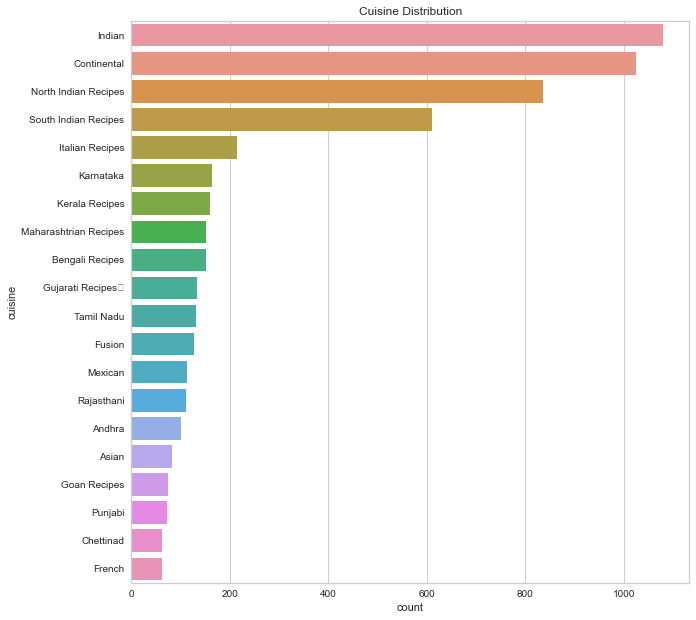

,ingredients_list
1514,"[avocado, whole wheat flour, cumin powder (jee..."
265,"[spaghetti pasta, garlic, extra virgin olive o..."
0,"[tortillas, extra virgin olive oil, garlic, mo..."
1451,"[बीटरूट, ककड़ी, पाइनएप्पल, अदरक, निम्बू का रस, ..."
6501,"[गाजर, घी, दूध, शक्कर, इलाईची पाउडर, बादाम]"


In [167]:
debug = False
#df = pd.read_json('../input/train.json').set_index('id')
#test_df = pd.read_json('../input/test.json').set_index('id')

df = train
test_df = test

if debug is True:
    df = dataML.sample(100)
    test_df = data_test.sample(100)
traindex = df.index
testdex = test_df.index
print("Training Data Shape: ",df.shape)
print("Testing Data Shape: ", test_df.shape)
y = df.cuisine.copy()

# Combine For Pre-Processing
df = pd.concat([df.drop("cuisine", axis=1), test_df], axis=0)
df_index = df.index
print("All Data Shape: ", df.shape)
del test_df; gc.collect();

sns.countplot(y=y, order=y.value_counts().iloc[:20].reset_index()["index"])
plt.title("Cuisine Distribution")
plt.show()

df.head()

#limiting to top 20 cuisine types

In [24]:
type(dataML['ingredients_list'])

pandas.core.series.Series

In [189]:
df.isna().any()[lambda x: x]

Series([], dtype: bool)

In [59]:
df = df.drop('ingredients_strings',1)

In [22]:
ingredients_backup

[["['tortillas'",
  "'extra virgin olive oil'",
  "'garlic'",
  "'mozzarella cheese'",
  "'red yellow or green bell pepper (capsicum)'",
  "'onions'",
  "'kalmatta olives'",
  "'button mushrooms']"],
 ["['sesame (gingelly) oil'",
  "'mustard seeds'",
  "'curry leaves'",
  "'garlic'",
  "'pearl onions (sambar onions)'",
  "'tomato'",
  "'tamarind'",
  "'turmeric powder (haldi)'",
  "'salt'",
  "'jaggery']"],
 ["['extra virgin olive oil'",
  "'pineapple'",
  "'white onion'",
  "'red yellow and green bell peppers (capsicum)'",
  "'pickled jalapenos'",
  "'coriander (dhania) leaves'",
  "'mint leaves (pudina)'",
  "'salt'",
  "'lemon juice'",
  "'paprika powder']"],
 ["['arhar dal (split toor dal)'",
  "'turmeric powder (haldi)'",
  "'salt'",
  "'dry red chilli'",
  "'mustard seeds'",
  "'asafoetida (hing)'",
  "'curry leaves'",
  "'coriander (dhania) leaves']"],
 ["['rajma (large kidney beans)'",
  "'cashew nuts'",
  "'sultana raisins'",
  "'asafoetida (hing)'",
  "'cumin seeds (jeera)'",

In [21]:
ingredients_backup = []

for ing in df['ingredients_list']:
    ingredients_backup.append([a.strip() for a in ing.split(",")])

Word Cloud Function..


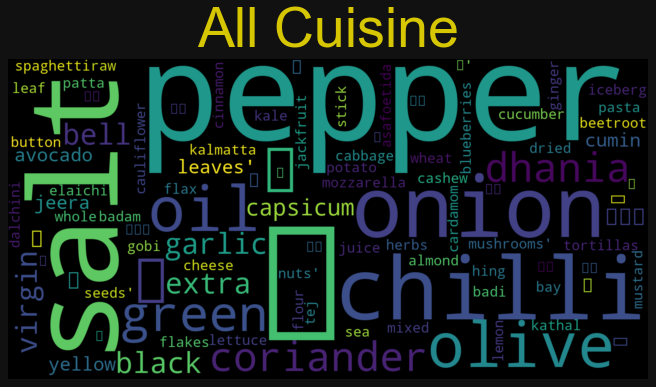

In [169]:
print("Word Cloud Function..")


stopwords = ["powder", "red"] + list(STOPWORDS)
size = (20,10)

def cloud(text, title, stopwords=stopwords, size=size):
    """
    Function to plot WordCloud
    Includes: 
    """
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    # Redundant when combined with my Preprocessing function
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()

# Data Set for Word Clouds
df["ing"] = df.ingredients_list.apply(lambda x: list(map(str, x)), 1).str.join(' ')
# All
cloud(df["ing"].values, title="All Cuisine", size=[8,5])

#wordcloud = WordCloud(width=1000, height=500, regexp=r"\w[\w' ],").generate("+".join(my_list))
    


In [170]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')], lowercase=False)
dummies = vect.fit_transform(df['ingredients_list'].apply(','.join)) 

df = pd.DataFrame(dummies.todense(),columns=vect.get_feature_names())
print("Vocab Length: ", len(vect.get_feature_names()))
print("All Data Shape: ", df.shape)
df.index= df_index

print("Number of Predictors: ", df.shape[0])
df.head()

Vocab Length:  1788
All Data Shape:  (7972, 1788)
Number of Predictors:  7972


,aachi fish masala,aam papad (sun dried mango),aamras,aar maach (fish),achari mayo,acorn squash,ada,adobo sauce,aerated water (soda water),agar agar,...,हरे प्याज के पत्ते,हरे मटर,हरे मुंग,हल्दि,हल्दी,हल्दी (ताज़ी),हल्दी पाउडर,हींग,ग़ुड,ज़ुकिनी
1514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
categorical_data = df.select_dtypes(exclude=[np.number])

In [179]:
categorical_data

""
1514
265
0
1451
6501
...
2115
2126
6364
7322


In [141]:
df.index = pd.to_numeric(df.index, errors='coerce')

In [183]:
type(df.id)

pandas.core.series.Series

In [181]:
df.dtypes

aachi fish masala              int64
aam papad (sun dried mango)    int64
aamras                         int64
aar maach (fish)               int64
achari mayo                    int64
                               ...  
हल्दी पाउडर                    int64
हींग                           int64
ग़ुड                            int64
ज़ुकिनी                         int64
id                             int64
Length: 1789, dtype: object

In [180]:
df['id'] = df.index

In [184]:
plt.figure(figsize = [15,9])
tsne = TSNEVisualizer()
tsne.fit(df.loc[traindex,:][:7000], y[:7000])
tsne.poof()

TypeError: '<' not supported between instances of 'float' and 'str'

<Figure size 1080x648 with 0 Axes>

In [190]:
# Create the visualizer and draw the vectors

plt.figure(figsize = [15,9])
tsne = TSNEVisualizer()
tsne.fit(df.loc[df.index.intersection(row_indices),:][traindex,:][:7000], y[:7000])
tsne.poof()

TypeError: '(Int64Index([1514,  265,    0, 1451, 6501, 4848, 6898, 2728,  838,   14,
            ...
            6265, 5734, 3092, 3772, 5191, 5226, 5390,  860, 7603, 7270],
           dtype='int64', length=6377), slice(None, None, None))' is an invalid key

<Figure size 1080x648 with 0 Axes>

In [150]:
X = df.loc[traindex,:]
print("Number of Cuisine Types: ", y.nunique())
print("X Shape: ", X.shape)
test_df = df.loc[testdex,:]
print("Test DF Shape: ", test_df.shape)
del df; gc.collect();

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([7985, 8000, 7987, 7999, 8002,\n            ...\n            7977, 7993, 7980, 7976, 7991],\n           dtype='int64', length=30). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [152]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [68]:
X = X.reshape(X.shape[1:])

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [70]:
start = 0
for i in range(0, len(X.index)):
    if (i + 1)%10 == 0:
        result = X.iloc[start:i+1].values.reshape(2,5)
        start = i + 1
        print(result)

ValueError: cannot reshape array of size 17880 into shape (2,5)

In [151]:
model = LogisticRegression(multi_class= 'ovr')
score = cross_validate(model, X, y, return_train_score=False)
score["test_score"].mean()

ValueError: Found input variables with inconsistent numbers of samples: [15944, 6377]

In [71]:
model.fit(X,y)
submission = model.predict(test_df)
submission_df = pd.Series(submission, index=testdex).rename('cuisine')
submission_df.to_csv("logistic_sub.csv", index=True, header=True)
print(submission_df.head())

ValueError: Input contains NaN